# **Understanding Train, Test, and Validation Split in Machine Learning**


In machine learning, splitting the dataset into training, test, and validation sets is crucial for building robust models that generalize well to new, unseen data. Here’s a detailed explanation of each:

1**. Train Dataset:**

Purpose: Used to fit the machine learning model.
Process: The model learns patterns, relationships, and structures from this data. It involves optimizing the model’s parameters to minimize error on the training data.

**2. Test Dataset:**

Purpose: Used to evaluate the fit machine learning model.
Process: After training, the model is tested on this data to estimate its performance on unseen data. This step helps in assessing the model's generalization ability.
Usage: The test data is only used once, after the model is fully trained and tuned, to get an unbiased evaluation of its performance.

**3. Validation Dataset:**

Purpose: Used to tune hyperparameters and perform model selection.
Process: The validation set helps in evaluating different models or configurations (like different hyperparameter settings) and selecting the best one. It helps in avoiding overfitting to the training data.
Usage: The validation set is used during the training process to make decisions about which model or hyperparameter settings to choose.

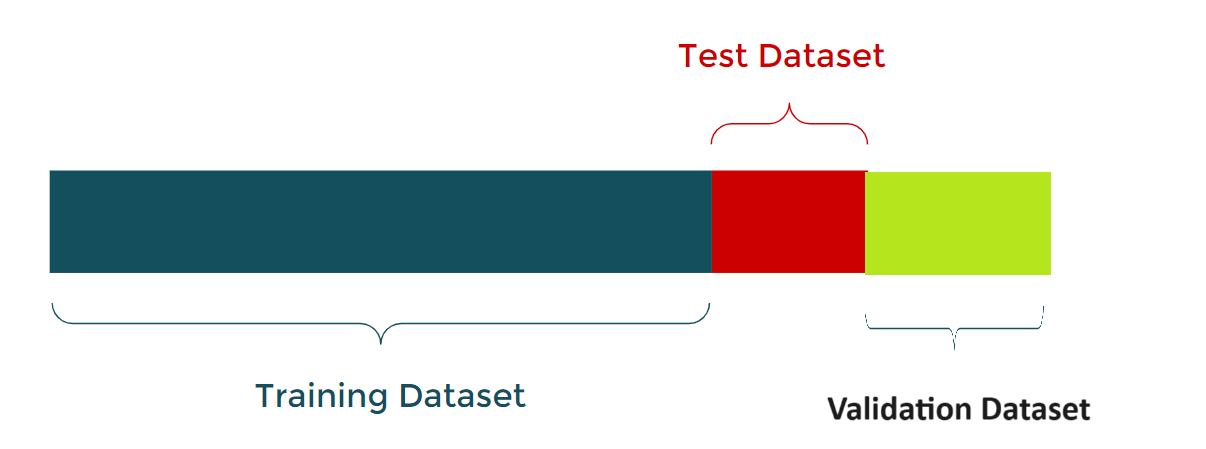

# <u><b> Understanding underfitting and overfitting </b></u>

### In machine learning and pattern recognition, there are many ways (an infinite number, really) of solving any one problem. Thus it is important to have an objective criterion for assessing the accuracy of candidate approaches and for selecting the right model for a data set at hand. We’ll discuss the concepts of under- and overfitting and how these phenomena are related to the statistical quantities bias and variance. Finally, we will discuss how these concepts can be applied to select a model that will accurately generalize to novel scenarios/data sets.

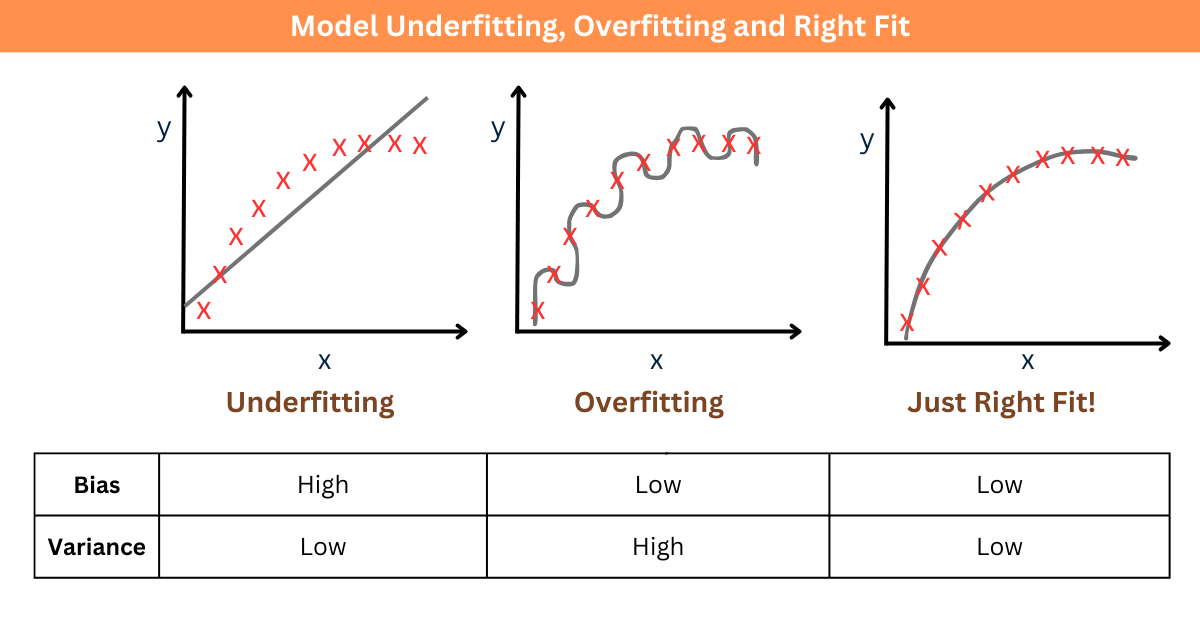

# Bias Variance Tradeoff vs Model Complexity

The bias-variance tradeoff is closely tied to model complexity in machine learning. As model complexity increases, bias generally decreases. This is because more complex models, such as deep neural networks or high-degree polynomial regressions, are capable of capturing intricate patterns in the training data, reducing systematic error (bias). However, this increased complexity often comes at the cost of higher variance, meaning the model becomes more sensitive to fluctuations in the training data and more likely to overfit.

On the other hand, simpler models—such as linear regression or shallow decision trees—tend to have higher bias because they make stronger assumptions about the data and may not capture all relevant patterns. However, their simplicity usually leads to lower variance, making them more robust to changes in the data and better at generalization in some cases.

The relationship between bias, variance, and model complexity forms a U-shaped curve when plotting total prediction error against model complexity. Initially, increasing complexity reduces error by lowering bias. But beyond a certain point, further complexity increases error due to higher variance. The goal is to find the optimal model complexity where the combined error from bias and variance is minimized. This balance ensures the model generalizes well to unseen data.


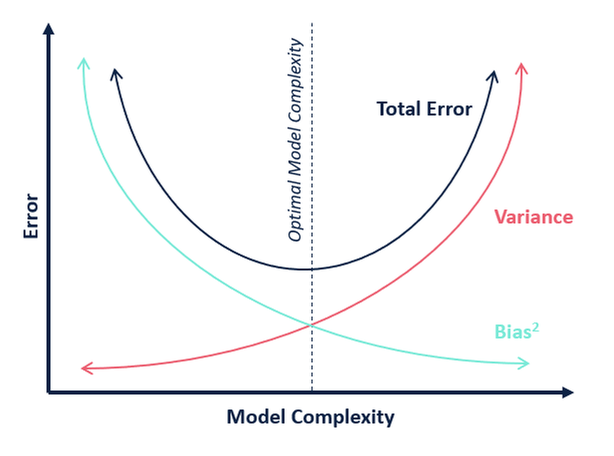

| **Model**                  | **Model Complexity** | **Best for Data Complexity**                             | **Strengths**                             | **Limitations**                              |
| -------------------------- | -------------------- | -------------------------------------------------------- | ----------------------------------------- | -------------------------------------------- |
| **Linear Regression (LR)** | Low                  | Low (linear patterns, low noise)                         | Simple, fast, interpretable               | Poor for non-linear or complex data          |
| **Naive Bayes**            | Low                  | Medium-high dimensional, sparse (e.g. text data)         | Fast, good with high-dimensional data     | Assumes feature independence                 |
| **KNN**                    | Low-Mid              | Low to moderate (non-linear patterns, small data)        | Simple, no training time                  | Slow prediction, sensitive to noise          |
| **Decision Tree (DT)**     | Mid                  | Moderate (some non-linearity and feature interaction)    | Interpretable, handles mixed data         | Prone to overfitting                         |
| **SVM**                    | Mid-High             | Moderate to high (clear margin, complex boundaries)      | Good for non-linear classification        | Sensitive to parameters, slow for large data |
| **Random Forest (RF)**     | High                 | High (noisy, many features, interactions)                | Robust, handles overfitting well          | Less interpretable                           |
| **Gradient Boosting (GB)** | High                 | High (structured/tabular, complex relationships)         | High accuracy, flexible                   | Longer training, more tuning                 |
| **XGBoost**                | High+                | Very high (complex, large structured data)               | Speed + performance, handles missing      | Complex tuning                               |
| **ANN (Neural Nets)**      | Very High            | Very high (non-linear, unstructured: images, text, etc.) | Can model any pattern (universal approx.) | Requires large data and tuning               |


# Hyper Parameter Tuning

**Hyperparameter tuning** is the process of finding the best combination of hyperparameters for a machine learning model to optimize its performance. Hyperparameters are external settings set before training (like learning rate, number of trees, or kernel type), unlike model parameters learned during training.

Tuning is crucial because hyperparameters greatly influence a model's accuracy, ability to generalize, and training time. For instance, in a random forest, the number of trees (`n_estimators`) and maximum tree depth (`max_depth`) can affect both performance and overfitting.

Common tuning methods include:

* **Grid Search**: Tests all possible combinations from a predefined set of values. It's exhaustive but can be slow.
* **Random Search**: Samples random combinations of hyperparameters. It's faster and often finds good results with fewer iterations.

Effective hyperparameter tuning helps strike the right balance between underfitting and overfitting, improving model performance on unseen data. It's especially important for complex models like XGBoost, SVM, and neural networks.


# Grid Search

**Grid Search** is a hyperparameter tuning method that exhaustively searches through a specified set of hyperparameter values to find the best combination for a model. You define a grid of possible values for each hyperparameter, and the algorithm trains and evaluates the model for every possible combination using cross-validation. It selects the set that gives the best performance based on a chosen metric (e.g., accuracy or F1 score). While Grid Search is simple and thorough, it can be computationally expensive, especially with many hyperparameters or large datasets. It's most effective when the parameter space is small and well-defined.

* it takes time

# Random Search

**Random Search** is a hyperparameter tuning technique that selects random combinations of hyperparameters from specified distributions. Unlike **Grid Search**, which tests all possible combinations, Random Search randomly samples a fixed number of combinations and evaluates model performance for each.

This method is often **more efficient** than Grid Search, especially when only a few hyperparameters significantly impact performance. It can explore a broader range of values in less time and is suitable for high-dimensional search spaces.

Random Search is ideal when:

* You have limited computational resources.
* You don’t know which parameters are most important.
* The parameter space is large.


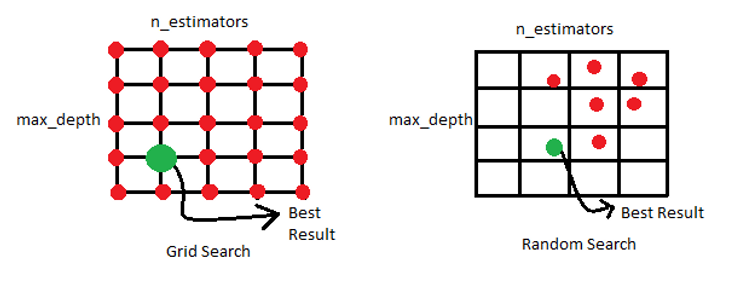

# Example

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
andrewmvd_heart_failure_clinical_data_path = kagglehub.dataset_download('andrewmvd/heart-failure-clinical-data')

print('Data source import complete.')


Data source import complete.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Read the dataset
df = pd.read_csv('/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')

In [ ]:
df.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [ ]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
# Scale the features
scaler = StandardScaler()
X = df.drop(columns=['DEATH_EVENT'])
y = df['DEATH_EVENT']
X = scaler.fit_transform(X)

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Using Grid Search

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import numpy as np
import itertools

# Build a simple model function with more hyperparameters
def build_model(learning_rate, units, activation, optimizer):
    model = Sequential([
        layers.Dense(units, activation=activation, input_shape=(X_train.shape[1],)),
        layers.Dense(1, activation='sigmoid')
    ])

    # Choose optimizer based on input
    if optimizer == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate)
    elif optimizer == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate)
    elif optimizer == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate)

    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Hyperparameter tuning via Grid Search
def grid_search(X_train, y_train, X_val, y_val, learning_rates, units_list, activations, optimizers, num_trials=10):
    best_val_acc = 0
    best_model = None
    best_params = None

    # Create a list of all hyperparameter combinations using itertools
    param_combinations = list(itertools.product(learning_rates, units_list, activations, optimizers))

    # Grid search
    for trial, (learning_rate, units, activation, optimizer) in enumerate(param_combinations):
        print(f"Trial {trial+1}: Learning Rate = {learning_rate}, Units = {units}, Activation = {activation}, Optimizer = {optimizer}")

        model = build_model(learning_rate, units, activation, optimizer)

        # Train the model
        history = model.fit(X_train, y_train, epochs=10, batch_size=32,
                            validation_data=(X_val, y_val), verbose=0)

        # Get validation accuracy
        val_acc = history.history['val_accuracy'][-1]
        print(f"Validation Accuracy: {val_acc}")

        # Track the best model based on validation accuracy
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model = model
            best_params = (learning_rate, units, activation, optimizer)

    return best_model, best_params, best_val_acc

# Example usage with dummy data
X_train = np.random.rand(100, 10)  # Example training data
y_train = np.random.randint(0, 2, 100)  # Example labels
X_val = np.random.rand(20, 10)  # Example validation data
y_val = np.random.randint(0, 2, 20)  # Example labels

# Define grid for hyperparameters
learning_rates = [1e-5, 1e-4, 1e-3   ]
units_list = [32, 64, 128]
activations = ['relu', 'tanh', 'sigmoid']
optimizers = ['adam', 'sgd', 'rmsprop']

# Run Grid Search
best_model, best_params, best_val_acc = grid_search(X_train, y_train, X_val, y_val, learning_rates, units_list, activations, optimizers, num_trials=10)
print(f"Best Hyperparameters: {best_params}, Best Validation Accuracy: {best_val_acc}")


Trial 1: Learning Rate = 1e-05, Units = 32, Activation = relu, Optimizer = adam
Validation Accuracy: 0.3499999940395355
Trial 2: Learning Rate = 1e-05, Units = 32, Activation = relu, Optimizer = sgd
Validation Accuracy: 0.3499999940395355
Trial 3: Learning Rate = 1e-05, Units = 32, Activation = relu, Optimizer = rmsprop
Validation Accuracy: 0.4000000059604645
Trial 4: Learning Rate = 1e-05, Units = 32, Activation = tanh, Optimizer = adam
Validation Accuracy: 0.6499999761581421
Trial 5: Learning Rate = 1e-05, Units = 32, Activation = tanh, Optimizer = sgd
Validation Accuracy: 0.6000000238418579
Trial 6: Learning Rate = 1e-05, Units = 32, Activation = tanh, Optimizer = rmsprop
Validation Accuracy: 0.6499999761581421
Trial 7: Learning Rate = 1e-05, Units = 32, Activation = sigmoid, Optimizer = adam
Validation Accuracy: 0.800000011920929
Trial 8: Learning Rate = 1e-05, Units = 32, Activation = sigmoid, Optimizer = sgd
Validation Accuracy: 0.6499999761581421
Trial 9: Learning Rate = 1e-05, 

# Random Search

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import numpy as np
import random

# Build a simple model function with more hyperparameters
def build_model(learning_rate, units, activation, optimizer):
    model = Sequential([
        layers.Dense(units, activation=activation, input_shape=(X_train.shape[1],)),
        layers.Dense(1, activation='sigmoid')
    ])

    # Choose optimizer based on input
    if optimizer == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate)
    elif optimizer == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate)
    elif optimizer == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate)

    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Hyperparameter tuning via Random Search
def random_search(X_train, y_train, X_val, y_val, learning_rates, units_list, activations, optimizers, num_trials=10):
    best_val_acc = 0
    best_model = None
    best_params = None

    # Random search
    for trial in range(num_trials):
        # Randomly choose hyperparameters from predefined lists
        learning_rate = random.choice(learning_rates)  # Randomly choose learning rate
        units = random.choice(units_list)  # Randomly choose number of units
        activation = random.choice(activations)  # Randomly choose activation function
        optimizer = random.choice(optimizers)  # Randomly choose optimizer

        print(f"Trial {trial+1}: Learning Rate = {learning_rate}, Units = {units}, Activation = {activation}, Optimizer = {optimizer}")

        model = build_model(learning_rate, units, activation, optimizer)

        # Train the model
        history = model.fit(X_train, y_train, epochs=10, batch_size=32,
                            validation_data=(X_val, y_val), verbose=0)

        # Get validation accuracy
        val_acc = history.history['val_accuracy'][-1]
        print(f"Validation Accuracy: {val_acc}")

        # Track the best model based on validation accuracy
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model = model
            best_params = (learning_rate, units, activation, optimizer)

    return best_model, best_params, best_val_acc

# Example usage with dummy data
X_train = np.random.rand(100, 10)  # Example training data
y_train = np.random.randint(0, 2, 100)  # Example labels
X_val = np.random.rand(20, 10)  # Example validation data
y_val = np.random.randint(0, 2, 20)  # Example labels

# Define hyperparameter grids
learning_rates = [1e-5, 1e-4, 1e-3, 1e-2]
units_list = [32, 64, 128]
activations = ['relu', 'tanh', 'sigmoid']
optimizers = ['adam', 'sgd', 'rmsprop']

# Run Random Search
best_model, best_params, best_val_acc = random_search(X_train, y_train, X_val, y_val, learning_rates, units_list, activations, optimizers, num_trials=10,random_state=0)
print(f"Best Hyperparameters: {best_params}, Best Validation Accuracy: {best_val_acc}")


Trial 1: Learning Rate = 0.0001, Units = 32, Activation = tanh, Optimizer = rmsprop
Validation Accuracy: 0.25
Trial 2: Learning Rate = 1e-05, Units = 64, Activation = tanh, Optimizer = sgd
Validation Accuracy: 0.4000000059604645
Trial 3: Learning Rate = 0.0001, Units = 32, Activation = relu, Optimizer = adam
Validation Accuracy: 0.3499999940395355
Trial 4: Learning Rate = 1e-05, Units = 64, Activation = tanh, Optimizer = rmsprop
Validation Accuracy: 0.25
Trial 5: Learning Rate = 0.01, Units = 32, Activation = tanh, Optimizer = adam
Validation Accuracy: 0.25
Trial 6: Learning Rate = 0.01, Units = 128, Activation = tanh, Optimizer = rmsprop
Validation Accuracy: 0.30000001192092896
Trial 7: Learning Rate = 0.0001, Units = 128, Activation = sigmoid, Optimizer = adam
Validation Accuracy: 0.25
Trial 8: Learning Rate = 0.01, Units = 32, Activation = relu, Optimizer = sgd
Validation Accuracy: 0.75
Trial 9: Learning Rate = 1e-05, Units = 128, Activation = relu, Optimizer = sgd
Validation Accura